In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [36]:
df = pd.read_csv('diamonds.csv')

In [37]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [38]:
df = df.rename(columns={'Unnamed: 0': ''}).set_index('')

In [39]:
# Create a new variable volume = X * Y * Z
df['volume'] = df['x'] * df['y'] * df['z']

# Univariate 

In [40]:
base_color = sns.color_palette()[0]

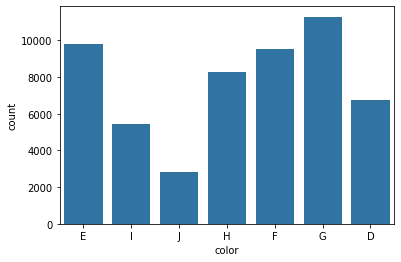

In [41]:
sns.countplot(data=df, x='color', color=base_color) ;

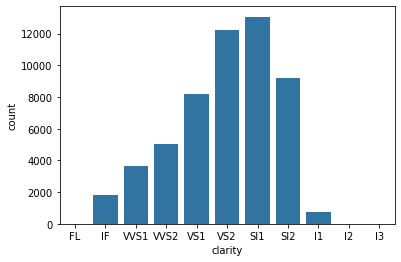

In [42]:
clarity_levels = ['FL','IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3'] #FL: flawless; I3: level 3
sns.countplot(data=df, x='clarity', color=base_color, order=clarity_levels);

In [43]:
clarity_type_count = df.groupby('clarity').size()
total_num = df.shape[0]

relative_count = clarity_type_count / total_num

clar_df = relative_count.reset_index()

In [44]:
relative_count #the percentage of each type

clarity
I1      0.013737
IF      0.033185
SI1     0.242214
SI2     0.170449
VS1     0.151483
VS2     0.227253
VVS1    0.067760
VVS2    0.093919
dtype: float64

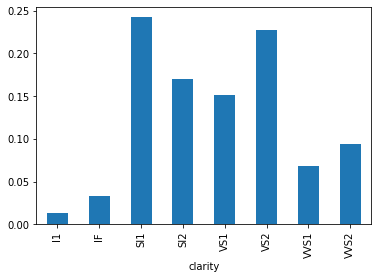

In [45]:
relative_count.plot(kind='bar');

S1 and VS2 constitute the majority of the sample

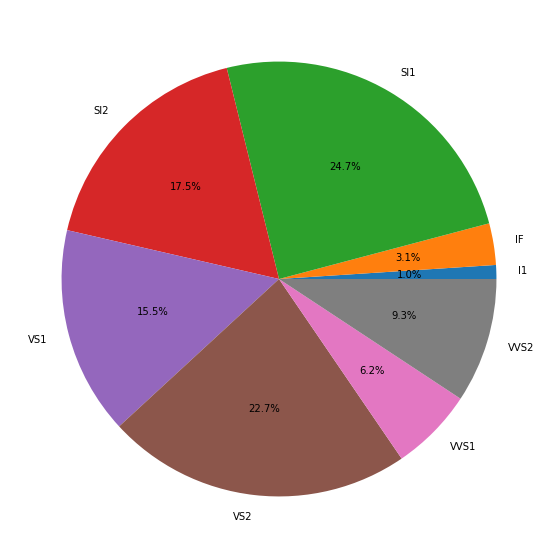

In [46]:
sizes = (relative_count.values*100).astype(int)
labels = relative_count.index

fig = plt.figure(figsize=(10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%');

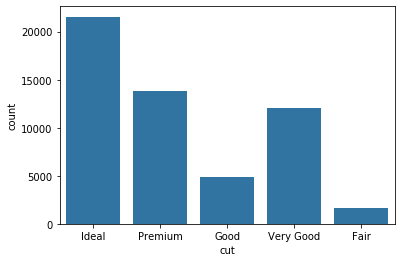

In [47]:
sns.countplot(data=df, x='cut', color=base_color);

In [48]:
df['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

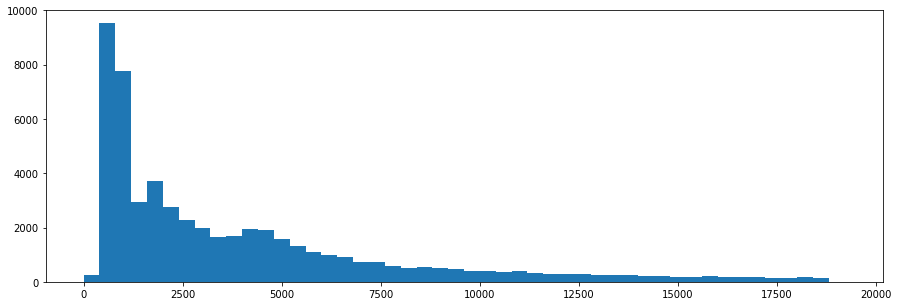

In [49]:
plt.figure(figsize=(15,5))
price_bins = np.arange(0, df['price'].max()+400, 400)
plt.hist(data=df, x='price', bins=price_bins);

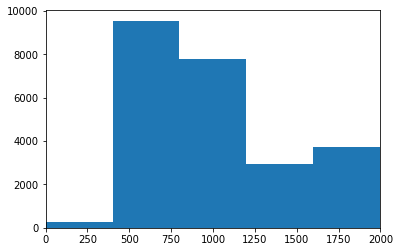

In [50]:
price_bins = np.arange(0, df['price'].max()+400, 400)
plt.hist(data=df, x='price', bins=price_bins);
plt.xlim([0,2000]);

Most prices are between 400 and 1200

# Bivariate

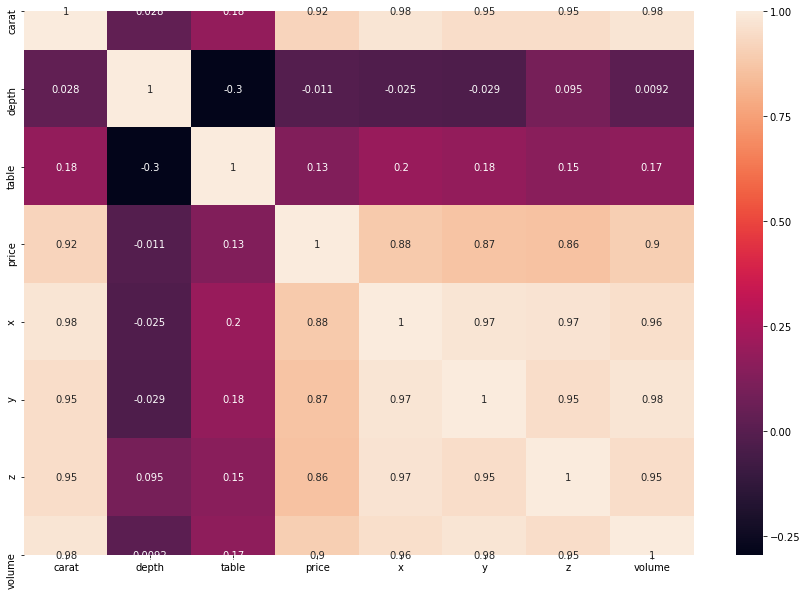

In [51]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True);

* price has the highest correlation with volume (0.9) and with carat (0.92)
* Carat and volume have the highest correlation (0.98)

### price and cut quality

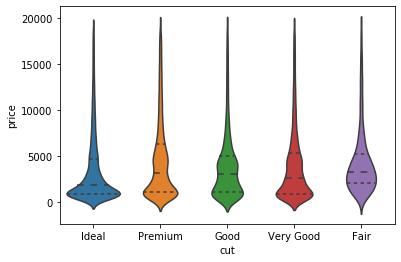

In [52]:
sns.violinplot(data=df, x='cut', y='price', inner='quartile');

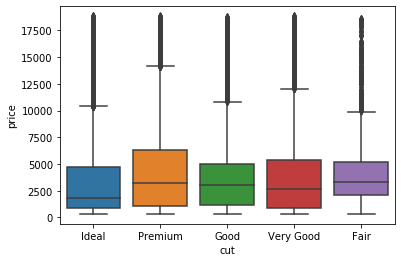

In [53]:
sns.boxplot(data=df, x='cut', y='price');

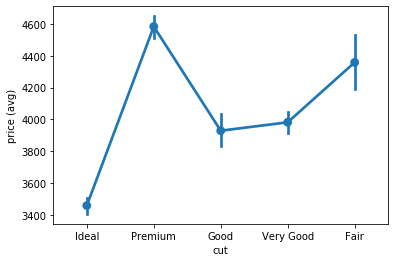

In [54]:
sns.pointplot(data=df, x='cut', y='price') # or sns.barplot()
plt.ylabel('price (avg)');

premium has the largest average price, whereas the ideal has the smallest

In [55]:
#Using programming
df.groupby('cut').mean()['price']

cut
Fair         4358.757764
Good         3928.864452
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Name: price, dtype: float64

### clarity and cut

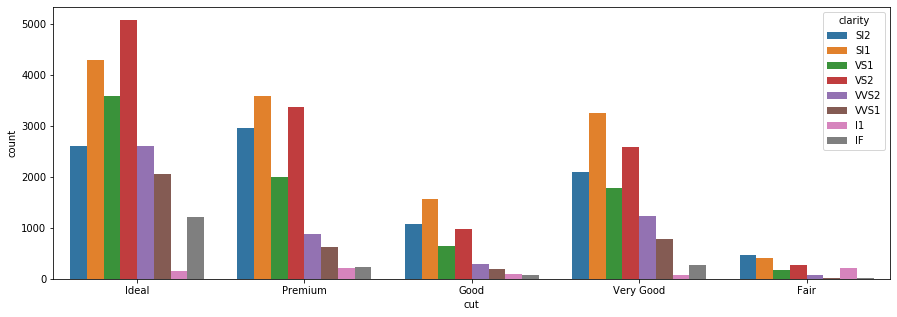

In [56]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='cut', hue='clarity')

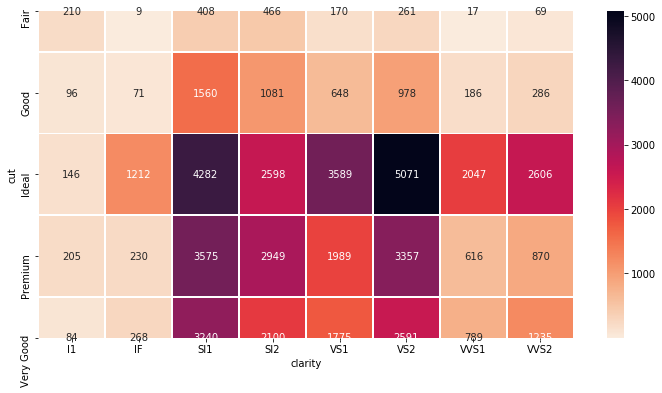

In [57]:
ct_counts = df.groupby(['cut', 'clarity']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='cut', columns='clarity', values='count')

plt.figure(figsize=(12,6))
sns.heatmap(ct_counts, annot=True, fmt='d', vmin=0.5, linewidths=0.5, cmap="rocket_r");

Ideal cut with clarity VS2 and S1 have the largest proportion

### The price and the volume

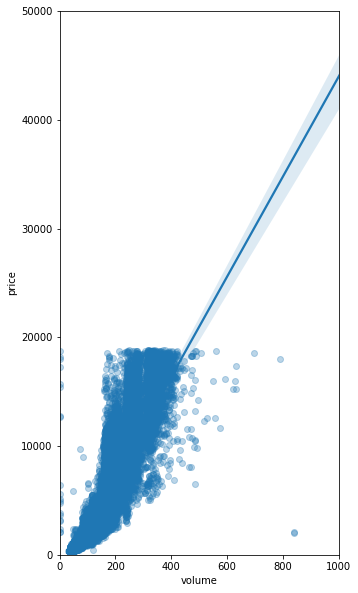

In [58]:
plt.figure(figsize=(5,10))
sns.regplot(data=df, x='volume', y='price', scatter_kws={'alpha':0.3} )
plt.xlim([0,1000]);
plt.ylim([0,50000]);

### price and carat

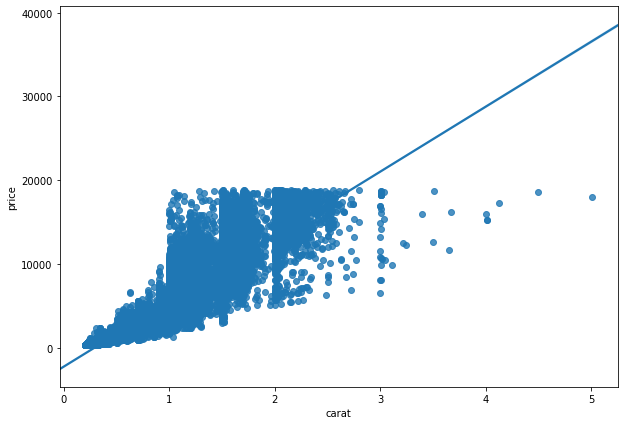

In [59]:
plt.figure(figsize=(10, 7))
sns.regplot(data=df, x='carat', y='price');

In [60]:
df['carat'].describe(), df['price'].describe()

(count    53940.000000
 mean         0.797940
 std          0.474011
 min          0.200000
 25%          0.400000
 50%          0.700000
 75%          1.040000
 max          5.010000
 Name: carat, dtype: float64, count    53940.000000
 mean      3932.799722
 std       3989.439738
 min        326.000000
 25%        950.000000
 50%       2401.000000
 75%       5324.250000
 max      18823.000000
 Name: price, dtype: float64)

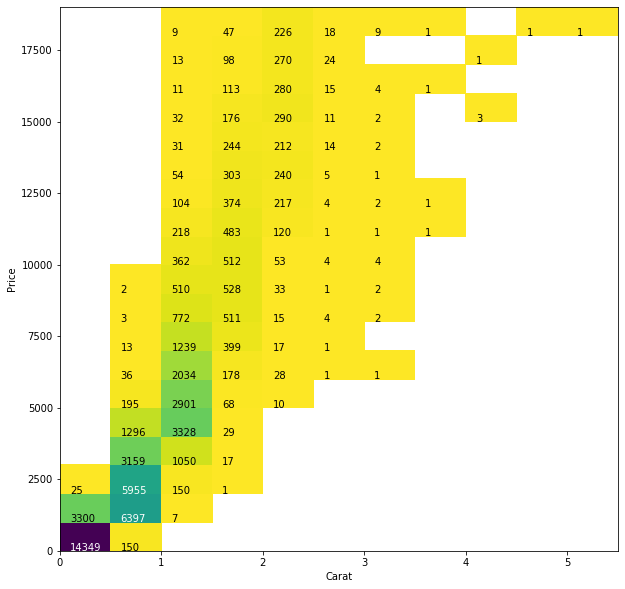

In [61]:
bins_x = np.arange(0, df['carat'].max()+0.5, 0.5)
bins_y = np.arange(0, df['price'].max()+1000, 1000)


plt.figure(figsize=(10,10))
h2d = plt.hist2d(data=df, x='carat', y='price', cmin=0.5, bins=[bins_x, bins_y], cmap = 'viridis_r');
plt.xlabel('Carat')
plt.ylabel('Price')

counts = h2d[0]

for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        
        if c >= 4000:
            plt.text(bins_x[i]+0.1 , bins_y[j] + 0.9, s=int(c), color='white')
            
        elif c > 0:
            plt.text(bins_x[i]+0.1, bins_y[j]+0.9, s=int(c), color='black')

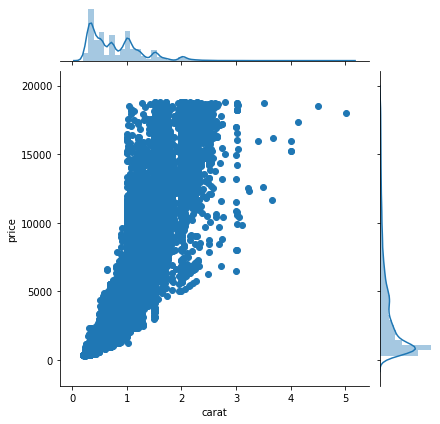

In [67]:
#bivariate exploration, in addition to marginal distribution of both x and y components
g = sns.JointGrid(data=df, x='carat', y='price');
g.plot_joint(plt.scatter);
g.plot_marginals(sns.distplot);

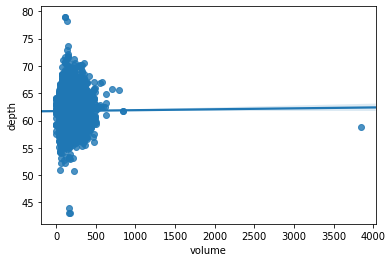

In [63]:
sns.regplot(data=df, x='volume', y='depth');

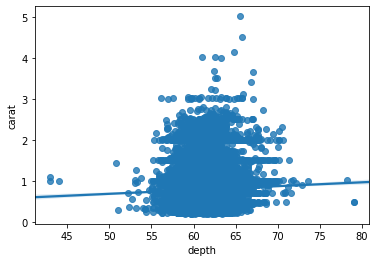

In [64]:
sns.regplot(data=df, x='depth', y='carat');

Clearly, from the above two plots, there is very weak correlation between carat and depth, also between volume and depth.

# Multivariate Exploration

### carat and price; color is encoded as where D= Best, J= Worst 

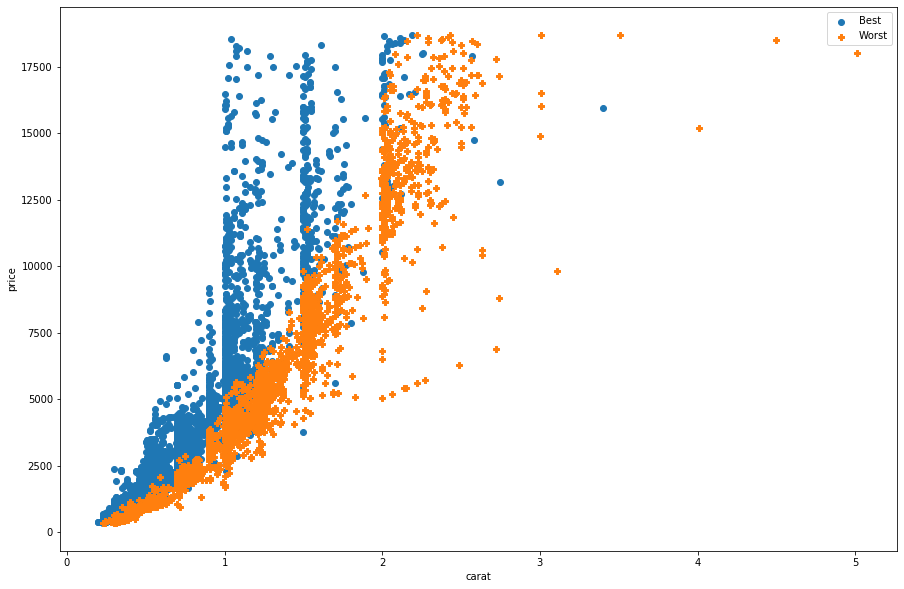

In [65]:
color_markers = [['D', 'o'],
               ['J', 'P']]

plt.figure(figsize=(15,10))
for color, marker in color_markers:
    df_cut = df[df['color'] == color]
    plt.scatter(data=df_cut, x='carat', y='price', marker=marker)

plt.legend(['Best', 'Worst'])
plt.xlabel('carat')
plt.ylabel('price');

### Use Faceting grid to add a third categorical variable

<Figure size 864x720 with 0 Axes>

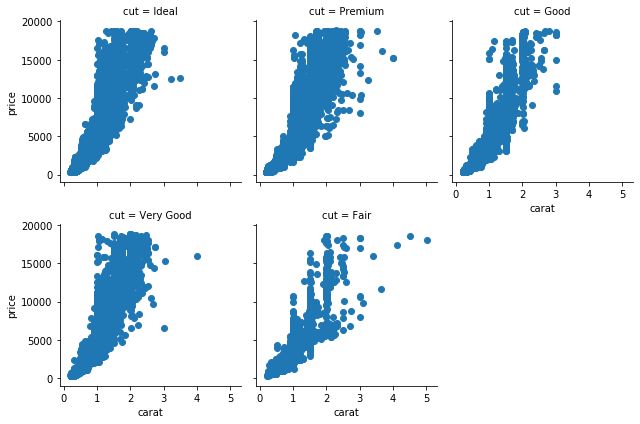

In [69]:
plt.figure(figsize=(12,10));
g = sns.FacetGrid(data=df, col='cut', col_wrap=3);
g.map(plt.scatter, 'carat', 'price');